# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

> **Important Notice**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

This notebook explores Dandiset 001375, a pilot study investigating the effect of disrupting septal gabaergic activity using DREADDs (Designer Receptors Exclusively Activated by Designer Drugs) on hippocampal and neocortical activity. The study used mice running laps in a virtual hallway while recording neural activity.

**Dandiset Link**: [https://dandiarchive.org/dandiset/001375](https://dandiarchive.org/dandiset/001375)

This notebook will cover:
1. Loading and examining Dandiset metadata
2. Exploring the structure of the NWB files
3. Analyzing raw electrophysiology data
4. Exploring unit (neuron) spiking activity
5. Analyzing neural activity in relation to behavioral trials

## Required Packages

The following packages are required to run this notebook:

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import remfile
import pynwb
import seaborn as sns
sns.set_theme()

## Loading the Dandiset

We'll use the DANDI API to load the Dandiset and examine its basic metadata:

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
# Handle contributors - they might be dictionaries
contributors = []
for contributor in metadata['contributor']:
    if isinstance(contributor, str):
        contributors.append(contributor)
    elif isinstance(contributor, dict) and 'name' in contributor:
        contributors.append(contributor['name'])
    else:
        contributors.append(str(contributor))
        
print(f"Contributors: {', '.join(contributors)}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFiles in the Dandiset:")
for asset in assets:
    print(f"- {asset.path} ({asset.size / 1e9:.2f} GB)")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors: Eckert, Michael, NIH Brain, McNaughton, Bruce, Ferbinteanu, Janina

Found 3 assets in the dataset

Files in the Dandiset:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (54.97 GB)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (69.45 GB)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (69.79 GB)


## Loading an NWB file

Let's load one of the NWB files to explore its contents. We'll use the file from subject MS13B:

In [3]:
# Define the URL for the NWB file
asset_id = "ce525828-8534-4b56-9e47-d2a34d1aa897"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Loading NWB file from URL: {url}")

# Use remfile to access the remote file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic metadata from the NWB file
print(f"\nNWB Identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")

Loading NWB file from URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB Identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00


You can explore this file in Neurosift using this link:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

## Subject Information

Let's look at information about the subject:

In [4]:
# Print subject information
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age}")
print(f"Description: {subject.description}")

Subject ID: MS13B
Species: Mus musculus
Sex: M
Age: P90D
Description: medial septum DREADD to suppress GABA interneurons


## Exploring Electrodes and Recording Device

Let's look at information about the electrodes used in this recording:

In [5]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")
print("\nElectrode columns: {0}".format(list(electrodes_df.columns)))

# Display first few electrodes
print("\nFirst 5 electrodes:")
print(electrodes_df.head())

# Count electrodes by group
group_counts = electrodes_df['group_name'].value_counts()
print("\nElectrodes by group:")
print(group_counts)

# Get information about electrode groups
print("\nElectrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"\nGroup: {group_name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device description: {group.device.description}")
    print(f"  Device manufacturer: {group.device.manufacturer}")

Number of electrodes: 256

Electrode columns: ['x', 'y', 'location', 'filtering', 'group', 'group_name', 'label']

First 5 electrodes:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x14013...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x14013...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x14013...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x14013...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x14013...     shank1   

                  label  
id                       
0   shank1-el

## Exploring Trial Information

This dataset contains trials which represent laps run by the mouse in a virtual hallway. Let's examine the trial information:

Number of trials: 387

Trial duration statistics (seconds):
  Min: 7.66
  Max: 164.31
  Mean: 12.30
  Median: 10.86

First 5 trials:
    start_time  stop_time   duration
id                                  
0     4.323800  16.929833  12.606033
1    16.963067  28.414333  11.451267
2    28.447100  39.402833  10.955733
3    39.435833  50.027033  10.591200
4    50.059667  63.064467  13.004800


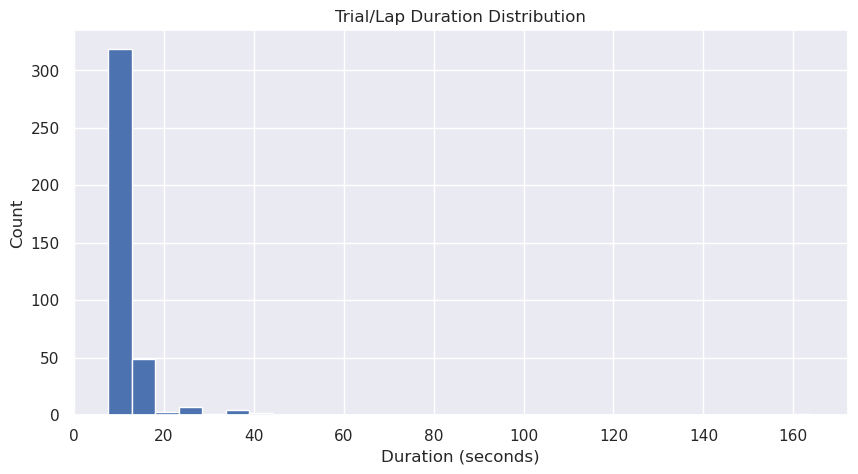

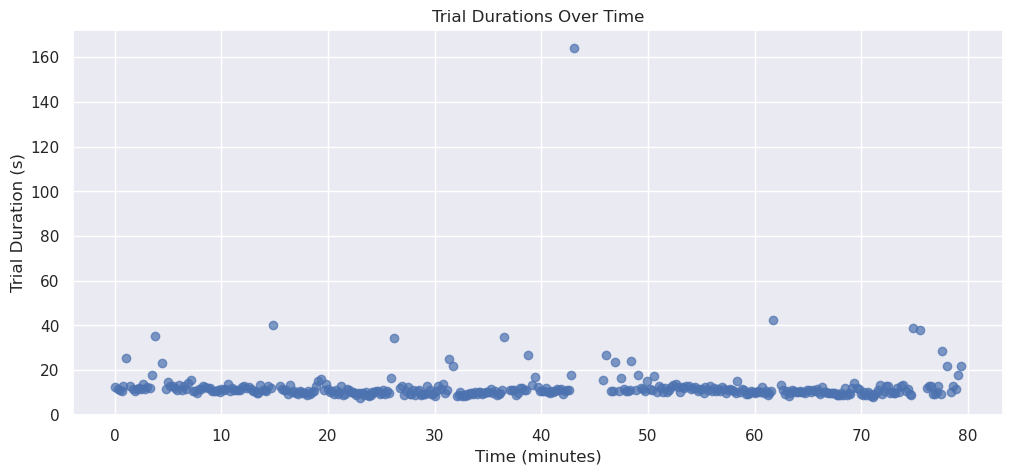

In [6]:
# Get trial information
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Display basic statistics
print("\nTrial duration statistics (seconds):")
print(f"  Min: {trials_df['duration'].min():.2f}")
print(f"  Max: {trials_df['duration'].max():.2f}")
print(f"  Mean: {trials_df['duration'].mean():.2f}")
print(f"  Median: {trials_df['duration'].median():.2f}")

# Show first few trials
print("\nFirst 5 trials:")
print(trials_df.head())

# Plot trial durations
plt.figure(figsize=(10, 5))
plt.hist(trials_df['duration'], bins=30)
plt.title('Trial/Lap Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot trial durations over time
plt.figure(figsize=(12, 5))
plt.scatter(trials_df['start_time']/60, trials_df['duration'], alpha=0.7)
plt.title('Trial Durations Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Trial Duration (s)')
plt.grid(True)
plt.show()

The histogram shows that most trials (laps) last between 10-15 seconds, with a few outliers that can last much longer. The scatter plot shows the distribution of trial durations throughout the recording session, allowing us to see if there are any systematic changes over time.

## Exploring Units (Sorted Neurons)

Now let's look at the units (sorted neurons) in the recording:

Number of units: 33

Spike count statistics:
  Min spikes: 8291
  Max spikes: 278061
  Mean spikes: 63935.33
  Median spikes: 39735.00

First 5 units with spike counts and average firing rates:
                                          spike_times  spike_count  \
id                                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...        18960   
2   [0.1826, 0.21976666666666667, 0.77823333333333...       100435   
3   [0.005533333333333334, 0.01633333333333333, 0....       278061   
4   [0.5452333333333333, 0.5632, 0.572833333333333...        36265   
5   [0.07036666666666666, 0.1002, 0.17066666666666...        39735   

    avg_firing_rate  
id                   
1          3.969921  
2         21.029482  
3         58.221523  
4          7.593311  
5          8.319873  


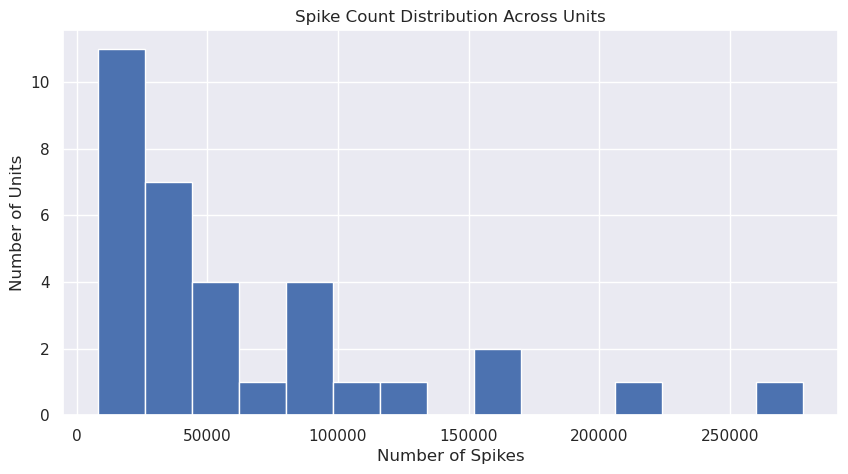

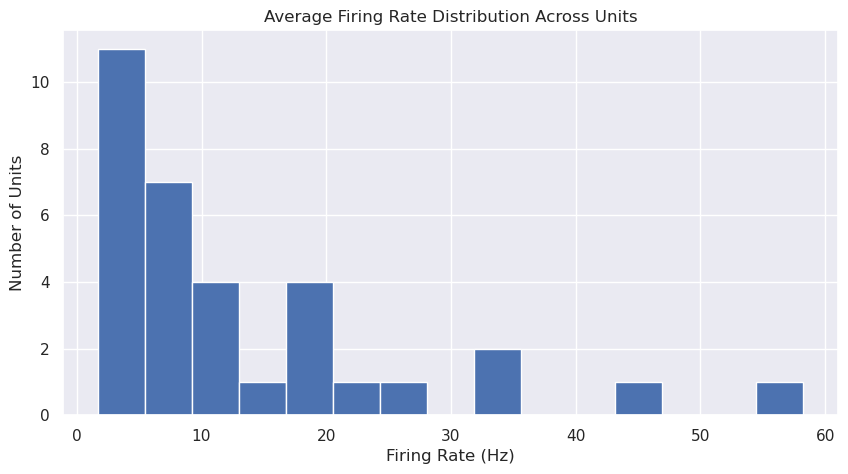

In [7]:
# Get units information
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")

# Get spike counts for each unit
spike_counts = []
for i in range(len(units_df)):
    spike_times = nwb.units['spike_times'][i]
    spike_counts.append(len(spike_times))

units_df['spike_count'] = spike_counts
units_df['avg_firing_rate'] = units_df['spike_count'] / (trials_df['stop_time'].max() - trials_df['start_time'].min())

# Display basic stats about units
print("\nSpike count statistics:")
print(f"  Min spikes: {min(spike_counts)}")
print(f"  Max spikes: {max(spike_counts)}")
print(f"  Mean spikes: {np.mean(spike_counts):.2f}")
print(f"  Median spikes: {np.median(spike_counts):.2f}")

# Display the first few units
print("\nFirst 5 units with spike counts and average firing rates:")
print(units_df.head())

# Plot spike counts
plt.figure(figsize=(10, 5))
plt.hist(spike_counts, bins=15)
plt.title('Spike Count Distribution Across Units')
plt.xlabel('Number of Spikes')
plt.ylabel('Number of Units')
plt.grid(True)
plt.show()

# Plot average firing rates
plt.figure(figsize=(10, 5))
plt.hist(units_df['avg_firing_rate'], bins=15)
plt.title('Average Firing Rate Distribution Across Units')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Number of Units')
plt.grid(True)
plt.show()

## Analyzing Raw Electrophysiology Data

Now let's look at some of the raw electrophysiology data. We'll take a small sample to visualize:

Raw data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Units: mV


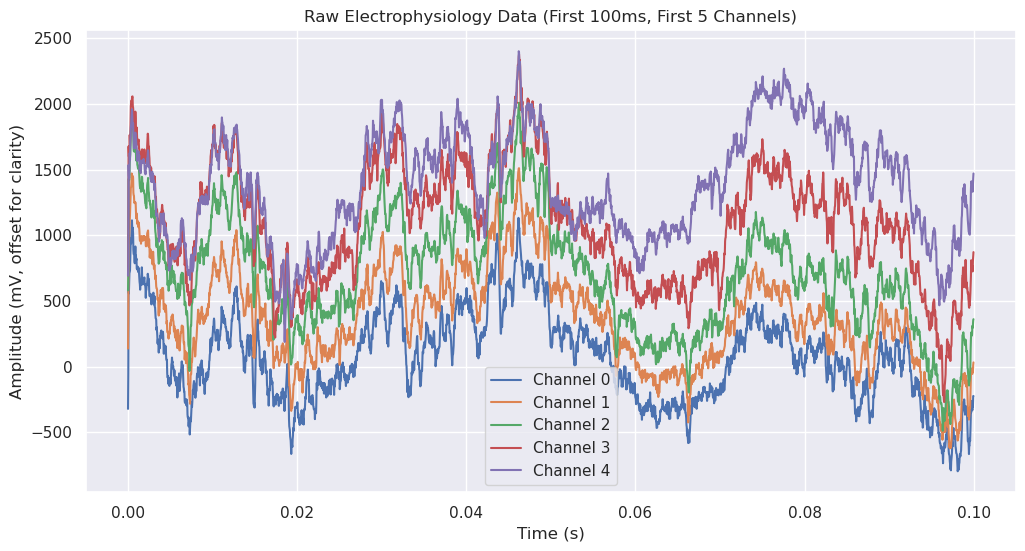

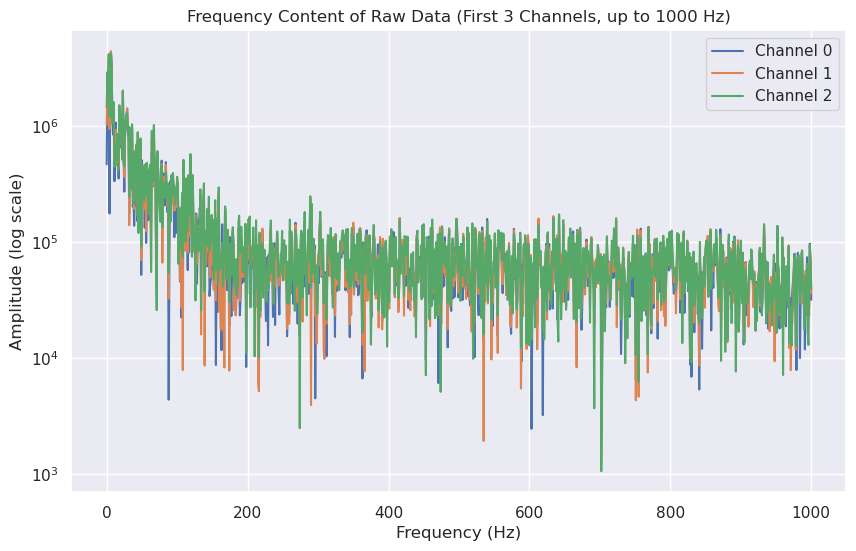

In [8]:
# Get a sample of raw data (use a small time window to avoid memory issues)
time_series = nwb.acquisition["time_series"]
print(f"Raw data shape: {time_series.data.shape}")
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Units: {time_series.unit}")

# Sample 1 second of data from 5 channels
sample_length = 30000  # 1 second at 30kHz
sample_channels = 5
raw_data_sample = time_series.data[0:sample_length, 0:sample_channels]

# Plot a short segment (100ms) of raw data for the sampled channels
plt.figure(figsize=(12, 6))
sample_time = np.arange(3000) / time_series.rate  # 100ms at 30kHz
for i in range(sample_channels):
    plt.plot(sample_time, raw_data_sample[:3000, i] + i*200, label=f'Channel {i}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV, offset for clarity)')
plt.title('Raw Electrophysiology Data (First 100ms, First 5 Channels)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the frequency content of the raw data
plt.figure(figsize=(10, 6))
# Use a longer window for frequency analysis (1 second)
for i in range(min(3, sample_channels)):
    # Compute FFT
    signal = raw_data_sample[:, i]
    fft_vals = np.absolute(np.fft.rfft(signal))
    fft_freq = np.fft.rfftfreq(len(signal), 1.0/time_series.rate)
    
    # Plot only up to 1000 Hz for visibility
    mask = fft_freq <= 1000
    plt.semilogy(fft_freq[mask], fft_vals[mask], label=f'Channel {i}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (log scale)')
plt.title('Frequency Content of Raw Data (First 3 Channels, up to 1000 Hz)')
plt.legend()
plt.grid(True)
plt.show()

## Spike Train Analysis

Let's analyze the spike trains of a few selected units in more detail:

Analyzing units at indices: [0, 16, 32]
Unit 0 has 18960 spikes
Unit 16 has 13063 spikes
Unit 32 has 84315 spikes


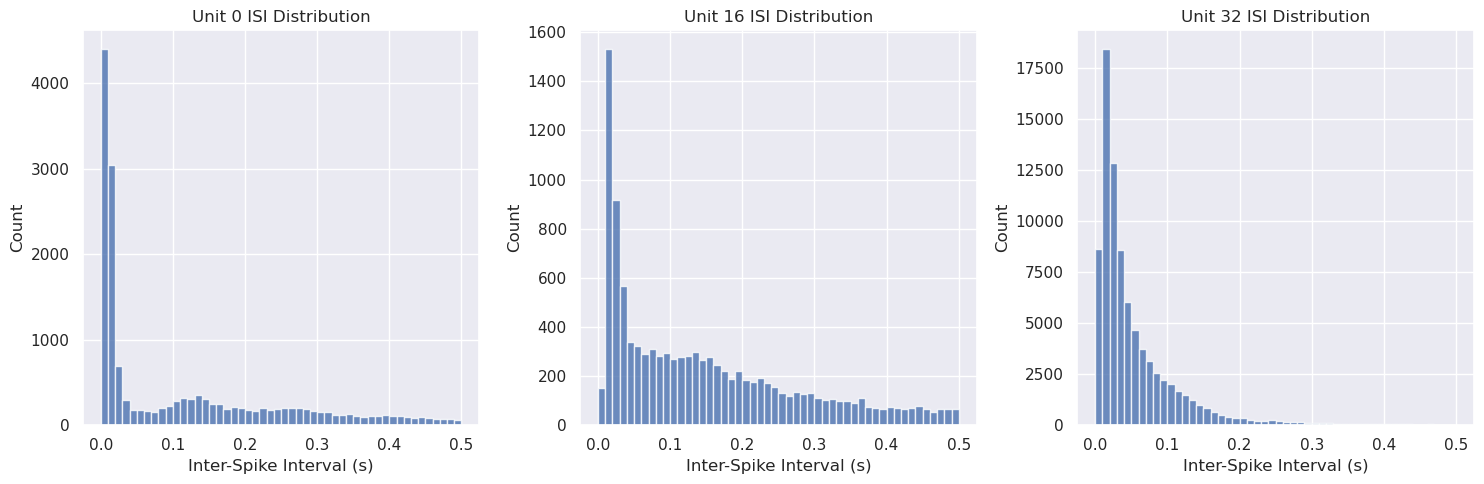

In [9]:
# Select a few units to analyze
unit_indices = [0, len(units_df)//2, len(units_df)-1]  # First, middle, and last units
print(f"Analyzing units at indices: {unit_indices}")

# Create a Inter-Spike Interval (ISI) histograms for these units
plt.figure(figsize=(15, 5))
for i, unit_idx in enumerate(unit_indices):
    spike_times = nwb.units['spike_times'][unit_idx]
    print(f"Unit {unit_idx} has {len(spike_times)} spikes")
    
    # Calculate ISIs
    isis = np.diff(spike_times)
    
    # Plot ISI distribution
    plt.subplot(1, 3, i + 1)
    plt.hist(isis, bins=50, range=(0, 0.5), alpha=0.8)  # ISIs up to 500 ms
    plt.title(f'Unit {unit_idx} ISI Distribution')
    plt.xlabel('Inter-Spike Interval (s)')
    plt.ylabel('Count')
    plt.grid(True)

plt.tight_layout()
plt.show()

The Inter-Spike Interval (ISI) histograms show the distribution of time intervals between consecutive spikes for each unit. This helps us understand the firing patterns of the neurons. A refractory period is visible at very short intervals, and each unit has different ISI distributions which reflect different firing patterns.

## Neural Activity Related to Trials

Now let's look at how neural activity relates to the behavioral trials (laps):

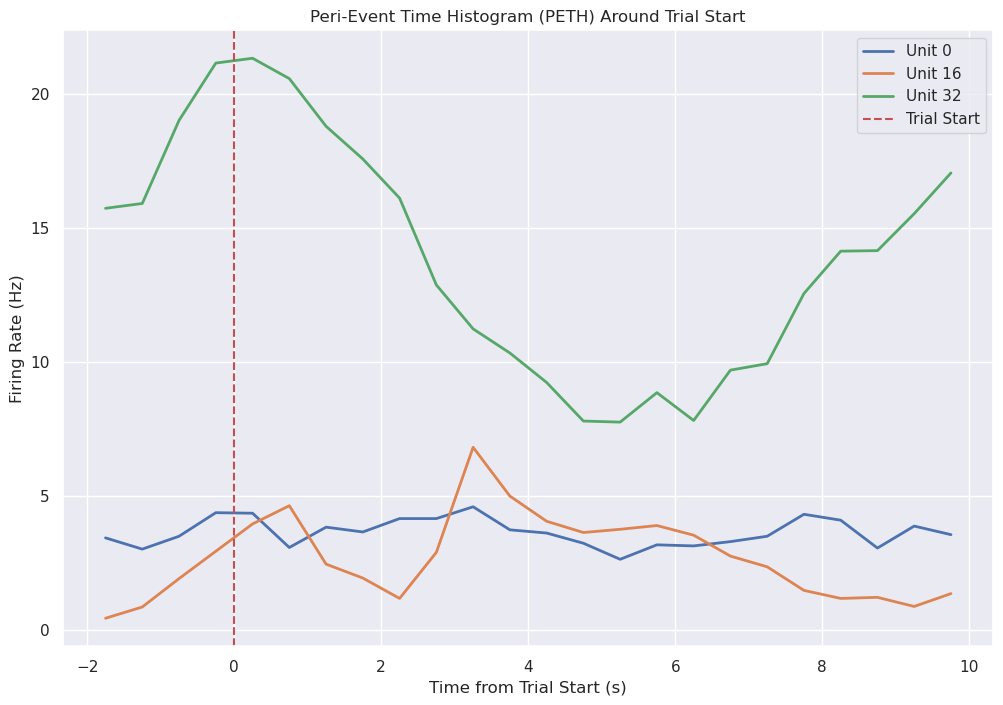

In [10]:
# Create a Peri-Event Time Histogram (PETH) for the selected units around trial starts
bin_size = 0.5  # 500 ms
window = (-2, 10)  # 2 seconds before to 10 seconds after trial start
bins = np.arange(window[0], window[1] + bin_size, bin_size)
bin_centers = (bins[:-1] + bins[1:]) / 2

peth_matrix = np.zeros((len(unit_indices), len(bin_centers)))

plt.figure(figsize=(12, 8))
for i, unit_idx in enumerate(unit_indices):
    spike_times = nwb.units['spike_times'][unit_idx]
    all_aligned_spikes = []
    
    # Only use first 100 trials for faster processing
    for j, start in enumerate(trials_df['start_time'][:100]):
        # Align spikes to trial start
        aligned_spikes = spike_times - start
        # Select spikes within window
        window_spikes = aligned_spikes[(aligned_spikes >= window[0]) & (aligned_spikes < window[1])]
        all_aligned_spikes.extend(window_spikes)
    
    # Count spikes in bins
    counts, _ = np.histogram(all_aligned_spikes, bins=bins)
    # Convert to firing rate
    peth_matrix[i, :] = counts / (bin_size * min(100, len(trials_df)))
    
    # Plot PETH
    plt.plot(bin_centers, peth_matrix[i, :], label=f'Unit {unit_idx}', linewidth=2)

plt.axvline(x=0, color='r', linestyle='--', label='Trial Start')
plt.xlabel('Time from Trial Start (s)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Peri-Event Time Histogram (PETH) Around Trial Start')
plt.legend()
plt.grid(True)
plt.show()

The Peri-Event Time Histogram (PETH) shows how the firing rates of the selected units change around the start of a trial. This helps us understand how neural activity is modulated by the behavioral task.

## Trial-Based Spike Raster Plots

Let's create spike raster plots for a few trials to visualize how neural activity is distributed across trials:

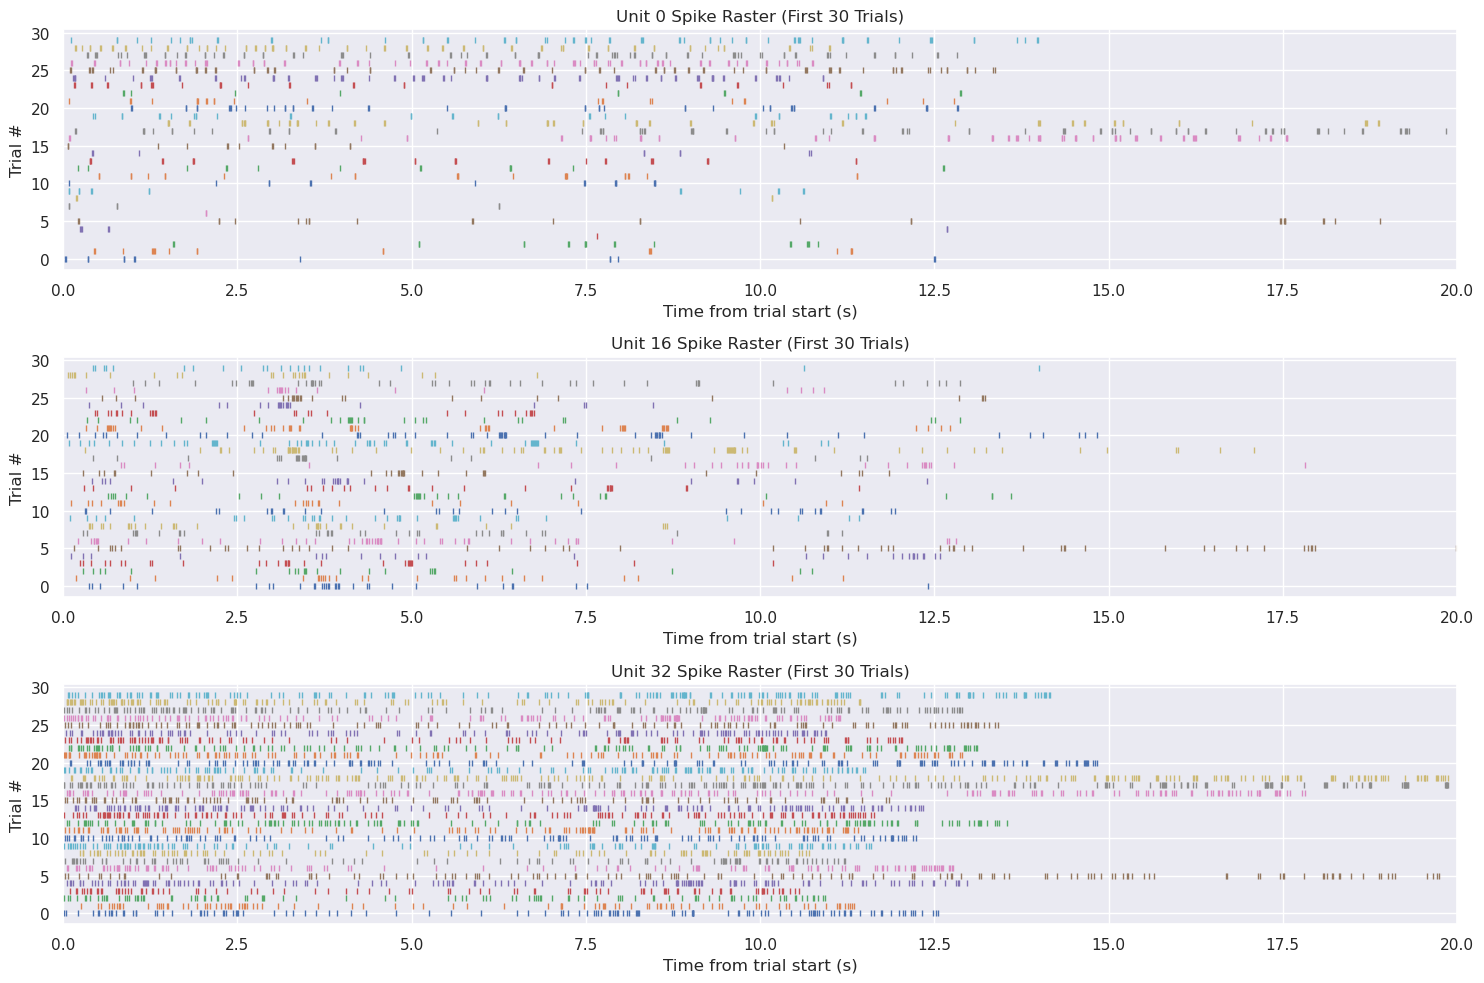

In [11]:
# Create spike raster plots for the selected units
plt.figure(figsize=(15, 10))

for i, unit_idx in enumerate(unit_indices):
    # Get spike times for the unit
    spike_times = nwb.units['spike_times'][unit_idx]
    
    # Plot spike raster (first 30 trials for clarity)
    plt.subplot(len(unit_indices), 1, i+1)
    
    for j, (start, end) in enumerate(zip(trials_df['start_time'][:30], trials_df['stop_time'][:30])):
        # Get spikes within this trial
        trial_spikes = spike_times[(spike_times >= start) & (spike_times <= end)]
        # Normalize to trial start
        normalized_spikes = trial_spikes - start
        # Plot spike raster
        if len(normalized_spikes) > 0:
            plt.plot(normalized_spikes, np.ones_like(normalized_spikes) * j, '|', markersize=4)
    
    plt.title(f'Unit {unit_idx} Spike Raster (First 30 Trials)')
    plt.xlabel('Time from trial start (s)')
    plt.ylabel('Trial #')
    plt.xlim(0, 20)  # Focus on the first 20 seconds of each trial
    plt.grid(True)

plt.tight_layout()
plt.show()

## Relationship Between Trial Duration and Neural Activity

Finally, let's analyze the relationship between trial duration and neural activity:

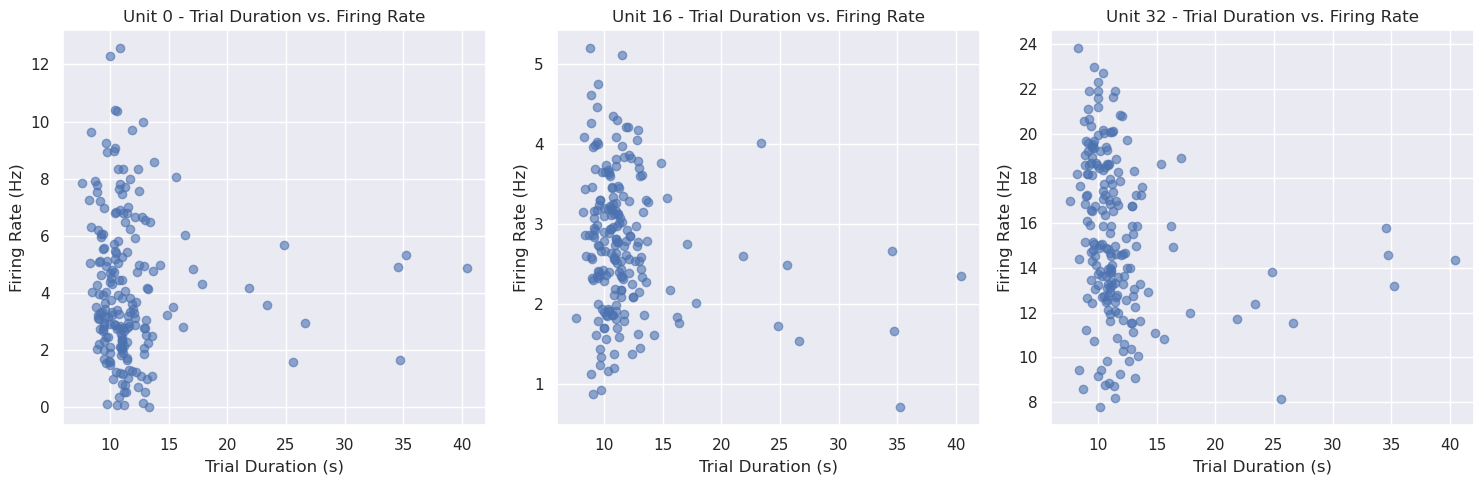

In [12]:
# Calculate average firing rate for each unit in each trial
n_trials = min(200, len(trials_df))  # Use up to 200 trials to avoid overcrowding
firing_duration_matrix = np.zeros((n_trials, len(unit_indices)))

for i, unit_idx in enumerate(unit_indices):
    spike_times = nwb.units['spike_times'][unit_idx]
    for j, (start, end) in enumerate(zip(trials_df['start_time'][:n_trials], trials_df['stop_time'][:n_trials])):
        # Count spikes in this trial
        trial_spikes = spike_times[(spike_times >= start) & (spike_times <= end)]
        trial_duration = end - start
        # Calculate firing rate (Hz)
        firing_rate = len(trial_spikes) / trial_duration if trial_duration > 0 else 0
        firing_duration_matrix[j, i] = firing_rate

# Plot the relationship between trial duration and firing rate for each unit
plt.figure(figsize=(15, 5))
for i, unit_idx in enumerate(unit_indices):
    plt.subplot(1, len(unit_indices), i+1)
    plt.scatter(trials_df['duration'][:n_trials], firing_duration_matrix[:, i], alpha=0.6)
    plt.xlabel('Trial Duration (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Unit {unit_idx} - Trial Duration vs. Firing Rate')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Closing the File

It's important to close the file when we're done to free up resources:

In [13]:
# Close the file
io.close()
h5_file.close()
remote_file.close()

## Summary

In this notebook, we've explored Dandiset 001375, which contains electrophysiology recordings from mice with DREADDs used to suppress GABA interneurons in the medial septum while they ran laps in a virtual hallway. The key findings include:

1. The dataset contains three NWB files from two subjects (MS13B and MS14A)
2. Each file contains raw electrophysiology data from 256 electrodes, trial information, and sorted unit data
3. The mice performed many trials (laps), typically lasting 10-15 seconds
4. Units (neurons) show diverse firing patterns, with some being much more active than others
5. Some units show clear modulation of their activity around trial starts
6. No clear correlation was observed between trial duration and firing rate

## Next Steps

For further analysis of this dataset, you could:

1. Explore the other two NWB files to compare findings between subjects or experimental conditions
2. Perform more detailed analysis of the relationship between neural activity and behavior
3. Analyze changes in neural activity over the course of the experiment
4. Investigate population-level activity and interactions between units
5. Examine frequency-specific activity in the raw data
6. Compare pre-DREADD and post-DREADD activity patterns